## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [15]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [16]:
train, test = keras.datasets.cifar10.load_data()

In [17]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [18]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [19]:
from keras.layers import BatchNormalization
def build_at_bn_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = BatchNormalization()(x)
            
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)   
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [22]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.2
EPOCHS = 30
#EPOCHS = 1
BATCH_SIZE = 256
BATCH_SIZE = 1024
MOMENTUM = 0.95


BATCH_SIZES = [32, 128, 256]


In [25]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for BATCH_SIZE in BATCH_SIZES:
    exp_name_tag = "exp-after_batch_exp-%s" % str(BATCH_SIZE)
    print("==",exp_name_tag,"==")


    model = build_at_bn_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}



    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

== exp-after_batch_exp-32 ==
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)       

Epoch 9/30
50000/50000 [==============================] - 3s 69us/step - loss: 1.5037 - acc: 0.4698 - val_loss: 1.6607 - val_acc: 0.4366
Epoch 10/30
50000/50000 [==============================] - 3s 70us/step - loss: 1.4943 - acc: 0.4746 - val_loss: 1.7299 - val_acc: 0.4012
Epoch 11/30
50000/50000 [==============================] - 4s 70us/step - loss: 1.4917 - acc: 0.4776 - val_loss: 1.8408 - val_acc: 0.3904
Epoch 12/30
50000/50000 [==============================] - 3s 69us/step - loss: 1.4702 - acc: 0.4841 - val_loss: 1.6390 - val_acc: 0.4368
Epoch 13/30
50000/50000 [==============================] - 4s 71us/step - loss: 1.4600 - acc: 0.4878 - val_loss: 1.5592 - val_acc: 0.4646
Epoch 14/30
50000/50000 [==============================] - 3s 70us/step - loss: 1.4463 - acc: 0.4944 - val_loss: 1.6270 - val_acc: 0.4406
Epoch 15/30
50000/50000 [==============================] - 3s 69us/step - loss: 1.4373 - acc: 0.4948 - val_loss: 1.5786 - val_acc: 0.4623
Epoch 16/30
50000/50000 [==========

Epoch 28/30
50000/50000 [==============================] - 3s 50us/step - loss: 1.0341 - acc: 0.6330 - val_loss: 1.6284 - val_acc: 0.4527
Epoch 29/30
50000/50000 [==============================] - 2s 50us/step - loss: 1.0260 - acc: 0.6366 - val_loss: 1.7988 - val_acc: 0.4647
Epoch 30/30
50000/50000 [==============================] - 2s 50us/step - loss: 1.0058 - acc: 0.6411 - val_loss: 1.6776 - val_acc: 0.4895


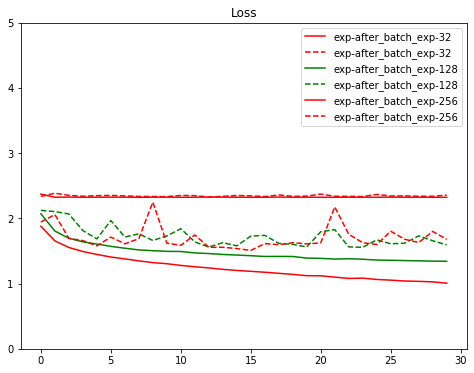

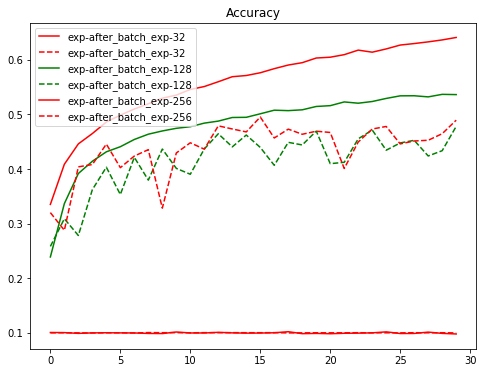

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i % len(color_bar)])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i % len(color_bar)])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i % len(color_bar)])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i % len(color_bar)])
plt.title("Accuracy")
plt.legend()
plt.show()